#  Linear Networks & Classification

###  **DSBA 6165: AI & Deep Learning**


## Goal

The goal of this lab activity is practicing to build a simple linear network for classification. For the practice, we use Iris dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/). 

In this lab, we repeat building and training a linear network and then extend it to deep neural networks. 
Along the way, we'll review the loss functions to train the classifiers. 


## Loading Data

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns


TF version: 2.18.0


### Iris Dataset

You can download [iris.data](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). Click the link and take a look at the data before starting to work the following TODOs. 


<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg" width=300 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 150 | Area: | Life |
| Attribute Characteristics: | Real | Number of Attributes: | 4 | Date Donated | 1988-07-01 |
| Associated Tasks: | Classification | Missing Values? | No | Number of Web Hits: | 5114202 |



The dataset contains the following attributes: 

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  * Iris Setosa
  * Iris Versicolour
  * Iris Virginica

Given the other attributes as input feature, we can train the model to classify the three classes. 


### TODO1
1. Copy the iris.data url from above and define the variable `data_url`.
1. Load the iris dataset with the `data_url` provided above and store the output into `dfiris` using pandas `read_csv`.
    1. Hint: Make sure to include the data url variable.
    1. Hint: Use the read_csv reference here: [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
    1. Hint: Include colnames when loading the data.

In [2]:

# TODO: copy and paste the url here
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Feature names
colnames = ["sepal length", "sepal width", "petal length", "petal width", "class"]

# TODO: read the data
dfiris = pd.read_csv(data_url, names=colnames)

# display the dfdauto
display(dfiris)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### TODO 1-1

1. Convert the column 'class' to dummy variables.
    1. Hint: Don't forget to use prefix and prefix seperator to have same column names. You can find detailed documentation here: [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In [6]:
# TODO:
df_data = pd.get_dummies(dfiris, columns = ['class'], prefix='class', dtype=int)
df_data

,sepal length,sepal width,petal length,petal width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## Visualize the data
 Seaborn, a visualization library, helps to visualize data with many plotting functions. To understand how variables in a dataset are related to one another and how that relationship is dependent on other variables, we can run visual analysis. This helps to visualize the trends and identify various patterns in the dataset.
 
### TODO 2
1. Using the seaborn `pairplot` plot, visualize the relationship between the independent varaibles. 
  * Here, we want to plot distributions of each class, so use `dfiris`, the one without dummy variables, NOT `df_data`.  
  * HINT: use `hue` to produce the same figure.

  

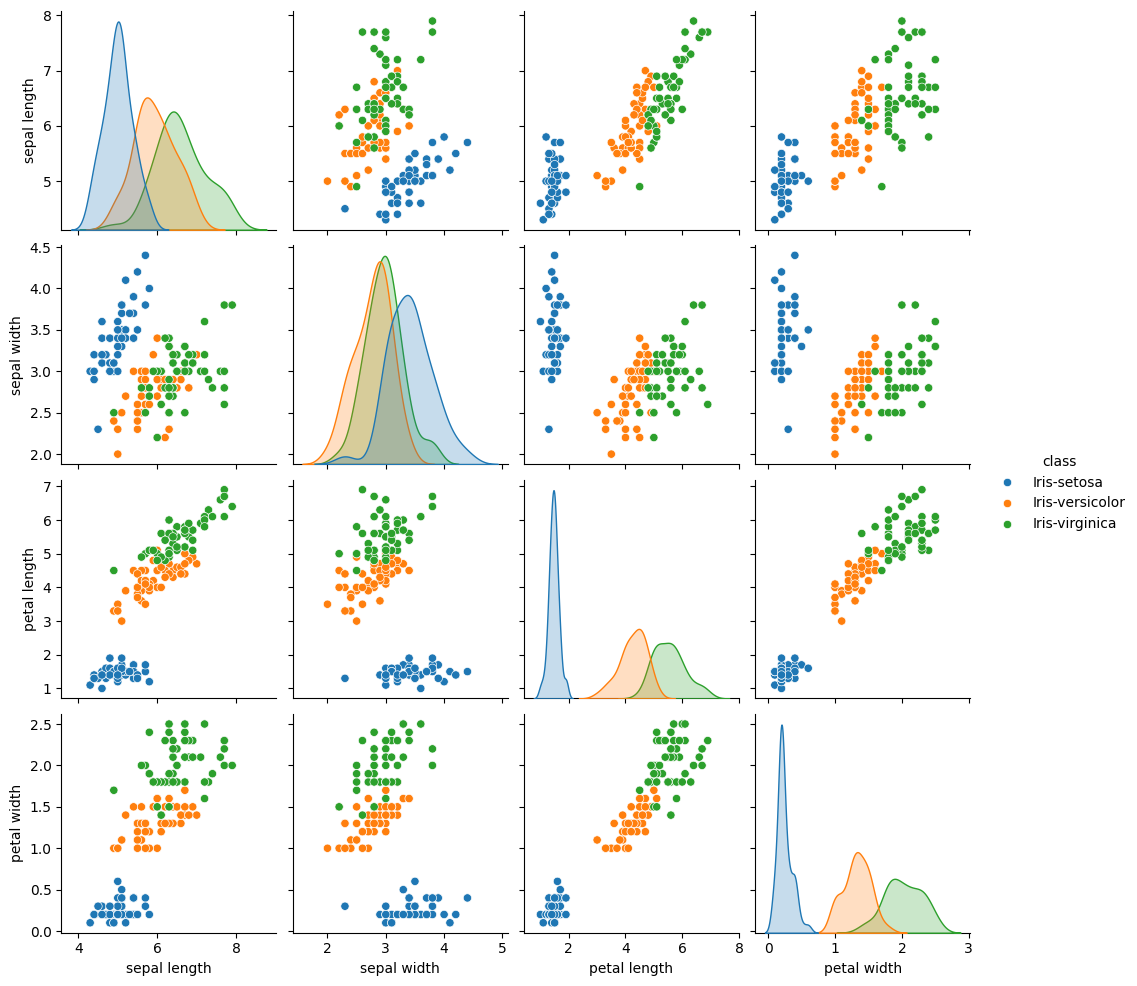

In [7]:
# TODO: your code here
sns.pairplot(dfiris, vars=["sepal length", "sepal width", "petal length", "petal width"], hue='class')

## Data Split




Now we have to split the training and testing data because it allows us to estimate the model's performance on new data and ensure that the model is not overfitting, which is when a model performs well on the training data but poorly on new data. By evaluating the model's performance on unseen data, we can get a better understanding of how well the model will perform when used in practice.


### TODO 3
1.Split the data now into 20% for testing and 80% for training, and used the previous lab code file as a reference.
1. Slice the label class to create `x_train`, `x_test`, `y_train`, and `y_test`.


In [63]:
train_data = df_data.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
test_data = df_data.drop(train_data.index)

In [64]:
train_data

,sepal length,sepal width,petal length,petal width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
114,5.8,2.8,5.1,2.4,0,0,1
62,6.0,2.2,4.0,1.0,0,1,0
33,5.5,4.2,1.4,0.2,1,0,0
107,7.3,2.9,6.3,1.8,0,0,1
7,5.0,3.4,1.5,0.2,1,0,0
...,...,...,...,...,...,...,...
57,4.9,2.4,3.3,1.0,0,1,0
131,7.9,3.8,6.4,2.0,0,0,1
65,6.7,3.1,4.4,1.4,0,1,0
32,5.2,4.1,1.5,0.1,1,0,0


In [65]:
train_data.shape, test_data.shape

((120, 7), (30, 7))

In [66]:
x_train = train_data.copy()
x_test = test_data.copy()

class_columns = ['class_Iris-setosa',	'class_Iris-versicolor',	'class_Iris-virginica']

y_train = x_train[class_columns]
y_test = x_test[class_columns]

x_train = x_train.drop(columns=class_columns)
x_test = x_test.drop(columns=class_columns)



In [67]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
...,...,...,...,...
57,4.9,2.4,3.3,1.0
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4
32,5.2,4.1,1.5,0.1


,sepal length,sepal width,petal length,petal width
9,4.9,3.1,1.5,0.1
14,5.8,4.0,1.2,0.2
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
25,5.0,3.0,1.6,0.2
29,4.7,3.2,1.6,0.2
36,5.5,3.5,1.3,0.2
39,5.1,3.4,1.5,0.2
47,4.6,3.2,1.4,0.2
49,5.0,3.3,1.4,0.2


,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
114,0,0,1
62,0,1,0
33,1,0,0
107,0,0,1
7,1,0,0
...,...,...,...
57,0,1,0
131,0,0,1
65,0,1,0
32,1,0,0


,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
9,1,0,0
14,1,0,0
19,1,0,0
21,1,0,0
25,1,0,0
29,1,0,0
36,1,0,0
39,1,0,0
47,1,0,0
49,1,0,0


Now, let us see how the column values are scaled so we can determine if we need normalization. 

In [68]:
df_data.describe().transpose()[['mean','std']] 

,mean,std
sepal length,5.843333,0.828066
sepal width,3.054000,0.433594
petal length,3.758667,1.764420
petal width,1.198667,0.763161
class_Iris-setosa,0.333333,0.472984
class_Iris-versicolor,0.333333,0.472984
class_Iris-virginica,0.333333,0.472984


## Linear Networks

We use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) again to build a linear network. This time, we don't use normalizer as the data is reasonably scaled. 

### TODO 4
1. Create `linear_model` using `Sequential` with `Input` and `Dense` layers. We need to make the linear model to produce 3 output values with softmax as activation function. 
    1. Hint: The number of your independent variables will be the shape of your input.
1. print the summary of the model using `summary`.

In [ ]:
# TODO:
linear_model = keras.Sequential()
linear_model.add(keras.Input(shape=(4,)))
linear_model.add(keras.layers.Dense(3, activation='softmax'))

# TODO
print(linear_model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

None


### TODO4-1
1. Using `compile`, prepare your model to have `SGD` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be 'categorical_crossentropy' and metrics as accuracy. 

In [72]:
# TODO:
linear_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']

)

### TODO4-2
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for `300 epochs` keeping `verbose` turned off (0), and `validation_split` be 20%.

In [73]:
%%time    

# TODO:
history = linear_model.fit(
    x_train, 
    y_train, 
    epochs=300, 
    verbose=0, 
    validation_split=0.2
    )


CPU times: total: 52.3 s
Wall time: 47.9 s


### TODO4-2.1
1. Create `plot_learning` function that plots the training and validation loss learning curve using the `history` argument. You can also refer to the previous lab session to complete this function.
1. Use the function to plot the learning curve.

In [76]:
# TODO
def plot_learning(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Class]')
    plt.legend()
    return plt.show()

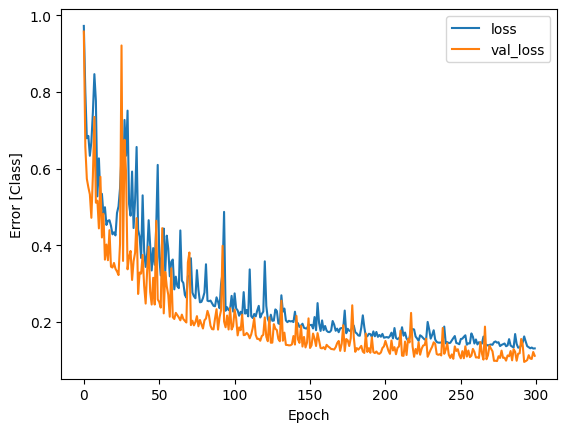

In [ ]:
#TODO
plot_learning(history)

### TODO4-3
1. `evaluate` the model on test data (`x_test` and `y_test`). 

In [79]:
# TODO:
linear_model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9333 - loss: 0.1120


[0.11199069023132324, 0.9333333373069763]

## Going Deep

### TODO 5
1. Now  build a neural network `deep_model` with hyperparameters given below:
  1. The first layer of the model should be your `Input` this should have the shape of no of independent variables.
  1. Add  hidden layer ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) with using `nHidden` hyperparameter variable and keep  'ReLU' as activation function for nonlinear transformation. 
  1. Add a output layer that produces 3 output value use 'softmax' as activation function.  
1. Print the summary of `deep_model`.
1. `compile` the model you have built keeping `SGD` as an `optimizer` with `learning_rate` use `alpha` variable which is given as Hyperparameters and have a loss function to be 'categorical_crossentropy'.
1. Now train the model using `fit`. You can refer to the training cell for `linear_model` use `nEpoch` variable which is given as Hyperparameters . 
1. Plot the learning curve using `plot_learning`.
1. Evaluate the model with test data.

HINT: You can choose the first three hyperparameters as you want. 

In [88]:
##### TODO: Hyperparameters 
alpha = 0.03
nEpoch = 250
nHidden = 50
###################################################

# TODO:
deep_model = keras.Sequential()
deep_model.add(keras.Input(shape=(4,)))
deep_model.add(keras.layers.Dense(nHidden, activation='relu'))
deep_model.add(keras.layers.Dense(3, activation='softmax'))


# TODO: summary
print(deep_model.summary())

# TODO: compile
deep_model.compile(    
    optimizer=keras.optimizers.SGD(learning_rate=alpha),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']

)




Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

None


In [89]:
%%time 

# TODO: train
deep_history = deep_model.fit(
    x_train,
    y_train, 
    epochs = nEpoch,
    verbose=0,
    validation_split=0.2
)


CPU times: total: 43.8 s
Wall time: 39.2 s


Now let us visualize the learning curve to observe how it learns.

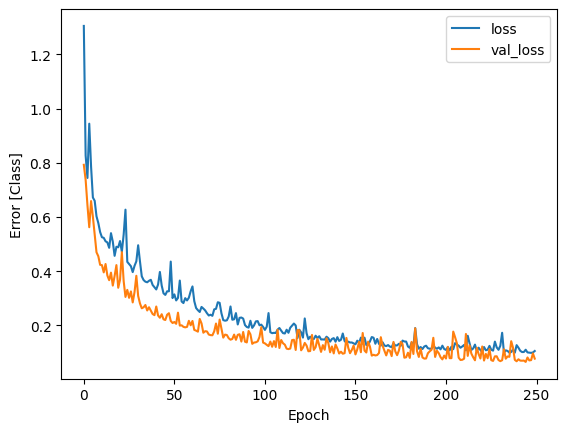

In [90]:
# TODO: learning curve
plot_learning(deep_history)

In [91]:
#TODO: evaluate
deep_model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9333 - loss: 0.0913


[0.09134077280759811, 0.9333333373069763]

### First Run:
Hyperparameters
* epochs = 500
* lr = 0.03
* hidden layers 100

Results
* High variance and overfitting - validation loss very noisy with consistent gap between training and validation loss 
* Validation loss shows high volatility and training loss more stable
* Neither showed any clear improvement over time and model is not converging to better solution as training progresses

Recommendation
* Decrease model complexity and number of epochs

### Second Run: 
Hyperparameters
* epochs = 250
* lr = 0.03
* hidden layers 50

Results
* Shows clear improvement and smooth, steady decline of losses over time.
* Less noise and volatility with no signs of overfitting. 